# Select valid elements for further analyses
Finally, the XRF data in WASA are all cleaned and collected into one dataset, and reprocessed by Q-Spec to obtain robust elemental profiles (mean MSE:1.19, std : 1.13). The data amount was reduced from 186957 to 170436. The steps are described in No.1-7 in the README.md.

In [1]:
import os
import numpy as np
import pandas as pd

from scipy import stats
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
%matplotlib inline

#path = '~\\GeopolarLabor\\#Projekte\\WASA'
#os.chdir(path)

In [4]:
cols = ['composite_id', 'Al', 'Ar', 'As', 'Ba', 'Bi', 'Br', 'Ca', 'Cl', 'Cr_coh', 'Cr_inc', 'Cs', 'Cu',
                'Fe', 'Ga', 'Ho', 'K', 'La', 'Mg', 'Mn', 'Ni', 'P', 'Pb', 'Pd', 'Rb', 'S', 'Sc', 'Se', 'Si',
                'Sn', 'Sr', 'Ti', 'Tm', 'V', 'W', 'Zn', 'Zr'] # can be more

X_raw_df = pd.read_csv('data/XRF_results.cleaned.all.csv', usecols=cols, index_col=0)

<AxesSubplot:>

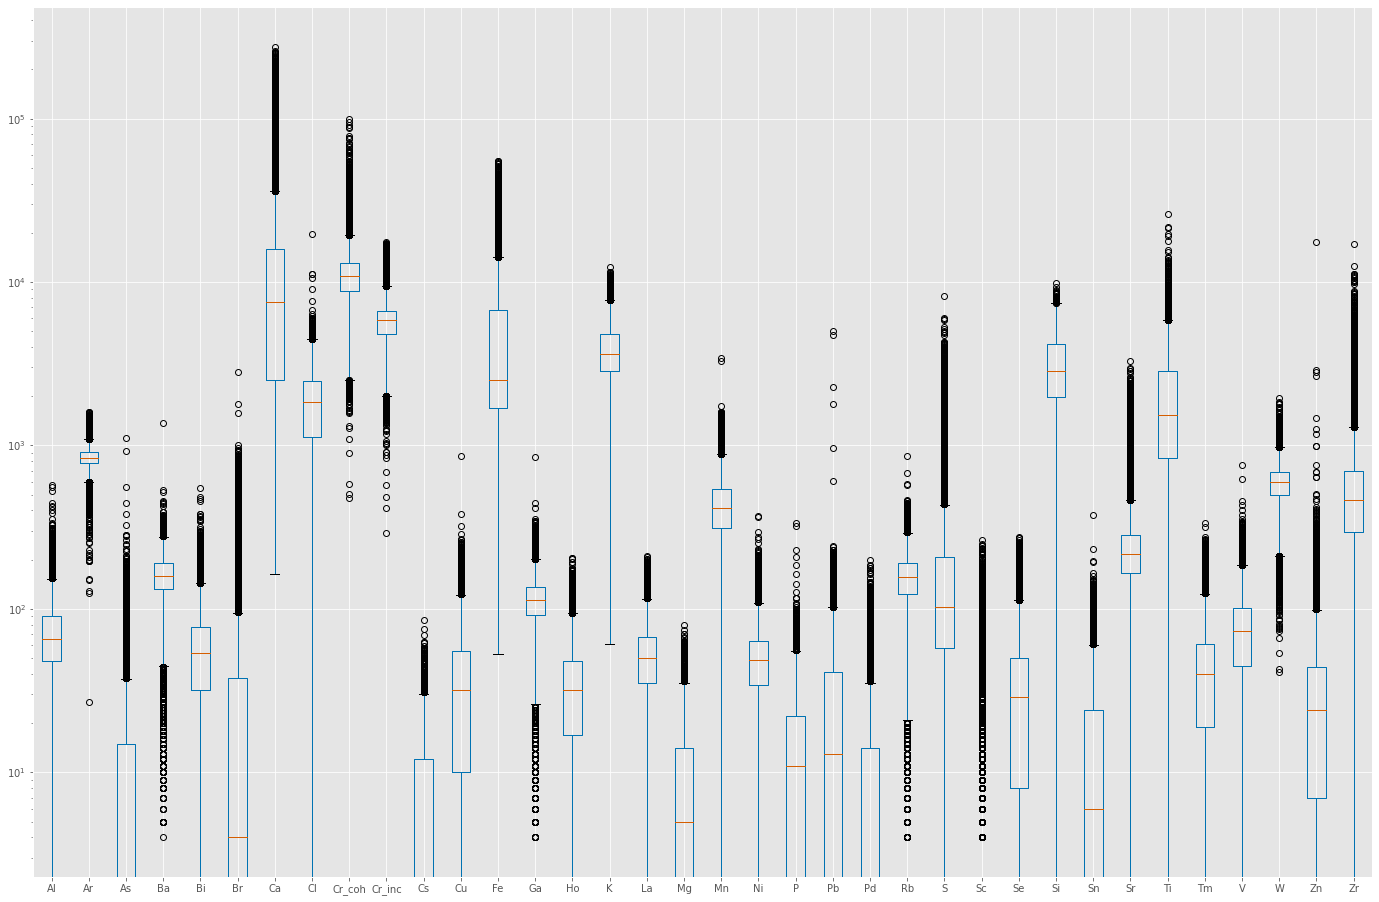

In [5]:
X_raw_df.plot(kind = 'box', figsize = (24, 16), logy = True)

The criteria: 1) the fluorescence signal of the analytes must not be severely affected by the X-ray tube’s primary radiation and has maximum counts >500, and 2) median counts are >100 or coefficients of variance are >2. <br>
These criteria are based on experience.

In [30]:
# calculate coeffifients of variance
cv = pd.Series((X_raw_df.std() / X_raw_df.mean()), name = 'CV')

# these are the elements severely affected by the X-ray tube’s primary radiation
# Ar is a signal reflecting air and crack. It's not in the project's interest
exc = ['Ar', 'Cr_coh', 'Cr_inc', 'Ga', 'Mn', 'W']

In [31]:
X_raw_df.columns[(X_raw_df.max() > 500) & ((X_raw_df.median() > 100) | (cv > 2)) & ~X_raw_df.columns.isin(exc)]

Index(['Ba', 'Br', 'Ca', 'Cl', 'Fe', 'K', 'Rb', 'S', 'Si', 'Sr', 'Ti', 'Zr'], dtype='object')